# Multi-layer Forward-feed NN with Stochastic Gradient Descent


In [1]:
%matplotlib inline
# All imports

from __future__ import print_function, division
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

np.set_printoptions(formatter={'float': '{:.5f}'.format})


In [2]:
print(4/3)
print(4//3)  # integer division

1.33333333333
1


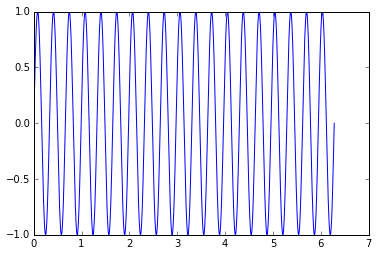

In [11]:
'''Dynamicall unpdata maplibplot figure'''
import time
from IPython import display

x = np.linspace(0, np.pi*2, 10000)
for k in range(20):
    plt.plot(x, np.sin(k*x))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)
    plt.clf()
plt.show()


## Truth Table for XOR
| $x_0$ | $x_1$ | $y$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   0   |
|   0   |   1   |   1   |
|   1   |   0   |   1   |
|   1   |   1   |   0   |

## Breakout Exercise
- ## Add tolerance (say, tol = 1e-2) to indicate success of failure or the training.  Find "average error" by finding the RMS error for all the training data (first adding the square of the error for each entry in X, then dividing the sum by the number of entries in y (the target), and finally taking square root).  


- ## For Every 1/10 of the specified number of epochs, check the RMS error, and print:

        epochs: 0  # or 1000, 2000, 3000, etc., for the case of epochs = 10000
        Training Results(data, prediction, expected):
        [0 0], -0.19071, 0
        [0 1], -0.80022, 1
        [1 0], 0.65594, 1
        [1 1], -0.47150, 0
        RMS_err: 0.951031492224


- ## If at some point, the RMS error is less than tol, the training is considered a success, and you break out of the for loop.  The following statement should be printed at the end:

        NN training succeeded!
        
    ## Otherwise, print 

        NN training failed.

In [126]:
'''
Play with the learning_rate

The default is 0.2.  You will see that setting it to 0.4 gets you better result.


'''
import pdb
def tanh(x):
    '''The logistic function as the activation'''
    return np.tanh(x)

def tanh_prime(z):
    '''derivative of the logistic function'''
    return 1 - z**2


class NeuralNetwork:
    
    '''
    Implementing multi-layer forward-feed ANN
    '''

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.L = len(layers) - 1

        # Set weights
        self.weights = []
        for l in range(1, self.L):
            w = np.random.random((layers[l-1] + 1, layers[l] + 1)) 
            self.weights.append(w)
        # output layer -- random((2+1, 1)) : 3 x 1
        w = np.random.random( (layers[l] + 1, layers[l+1]))
#         pdb.set_trace()
        self.weights.append(w)
#         print(len(self.weights))
#         print(self.weights)
#         raise KeyboardInterrupt

    def fit(self, X, y, learning_rate=0.4, epochs=11000, tol = 0.01):
        '''
        Backpropagation
        '''
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        print('Input X with bias added:\n', X)
         
        for k in range(epochs):
            if k % (epochs/10) == 0:
                print('epochs:', k)
                error1 = 0
                for e in range(len(X)):
                    print(X[e][1:],self.predict(X[e][1:]),y[e] )
                    error1 += (self.predict(X[e][1:]) - y[e])**2
                RMS = ((error1)/len(y))**0.5
                print('RMS', RMS[0])
                if RMS < tol:
                    print('NN training succeeded!')
                    return
 
            i = np.random.randint(X.shape[0])
            a = [X[i]]
    
            for l in range(self.L):
                    tot_input_l = np.dot(a[l], self.weights[l])
                    a_lplusOne = self.activation(tot_input_l)
                    a.append(a_lplusOne)

            # Now preparing for backpropagation by finding all the delta's
            # and store them in a list, deltas:                    
                    
            # output layer; a[-1] is the output, z
            error = y[i] - a[-1]
            # deltas at this point is list that contains a single vector,
            # the delta closest to the output -- eqn (3) on slide 9.
            deltas = [error * self.activation_prime(a[-1])]

            # now find the rest of the deltas.
            # remember len(a) is L + 1, and len(self.weights) is L,
            # where L is the number of layers.  In our case, L = 2.
            for l in range(self.L - 1, 0, -1): 
                delta_l = deltas[-1]
                # This is eqn (4) on slide 9.                
                delta_lminusOne = delta_l.dot(self.weights[l].T)*self.activation_prime(a[l])
                deltas.append(delta_lminusOne)
                
            # reverse
            # [layer 2(output)->layer 1(hidden)]  => [layer 1(hidden)->layer 2(output)]
            deltas.reverse()

            # backpropagation: adjusting weights
            for l in range(self.L):
                a_l = np.atleast_2d(a[l])
                delta_l = np.atleast_2d(deltas[l])
                # implementing eqn (5) on slide 12
                # (to be precise, the equation just above (5))
                self.weights[l] += learning_rate * a_l.T.dot(delta_l)
        if RMS > tol:
            print('NN training failed.')

    def predict(self, x): 
        '''
        forward propagation
        (Note -- possibly improvement:
        a) create a method that adds bias to be used here and in the fit method.
        b) create a method that does forward propagation to be used here and 
        in the method fit.)
        '''
        # adding bias -- np.ones(1) seems silly: 
        # But to concatenate, both objects have to be numpy arrays.
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=1)  
        # forward propagation
        for l in range(0, self.L):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

# if __name__ == '__main__':

#     # activation='sigmoid' doesn't seem to work so well.
#     nn = NeuralNetwork([2,2,1])

#     X = np.array([[0, 0],
#                   [0, 1],
#                   [1, 0],
#                   [1, 1]])

#     y = np.array([0, 1, 1, 0])

#     nn.fit(X, y)

#     #for e in range(len(X)):
#         #print(X[e],nn.predict(X[e]),y[e] )
        

In [ ]:
nn = NeuralNetwork([2,2,1], activation='tanh')

X = np.array([[0, 0],
              [0, 1],          
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

nn.fit(X, y, epochs = 20000)



## Breakout Exercise:

## Write a function visual_NN_boundaries(X, y, Nsamp = 2000) that generates 2000 random points in the square of x between (0, 1) and y between (0, 1) to visualize the decision boundaries, where x and y are Cartesian coordinates.


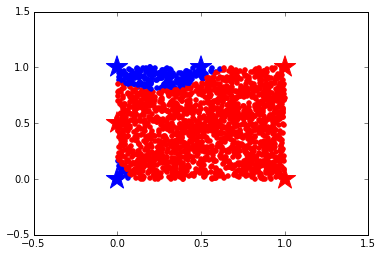

In [104]:
def visual_NN_boundaries(X, y, Nsamp = 2000):
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i][0],X[i][1], color = 'r', s = 500, marker = '*')
        else:
            plt.scatter(X[i][0],X[i][1], color = 'b', s = 500, marker = '*')
    x = np.random.random((Nsamp, 2))
    for j in range(len(x)):
        z = nn.predict(x[j])
        if z > 0.5:
            plt.scatter(x[j][0], x[j][1], color = 'r')
        else:
            plt.scatter(x[j][0], x[j][1], color = 'b')
        
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()

visual_NN_boundaries(X, y)
    
    
    

In [94]:
print(np.random.random((2000, 2)))

[[0.08868 0.25832]
 [0.14355 0.86165]
 [0.38924 0.12735]
 ..., 
 [0.45042 0.25711]
 [0.85107 0.74251]
 [0.61823 0.06434]]


## Breakout Exercise:

## Draw on a piece of paper the following points, using open circle if the corresponding target value, y, is 0 and filled circle for y = 1:


        X =  [[0, 0],
              [0, 1],  
              [0.5, 1],
              [0, 0.5],
              [1, 0],
              [1, 1]])

        y = [0, 0, 0, 1, 1, 1]

## Train the NeuralNetwork class to reproduce the y, given X.

## Use the function visual_NN_boundaries to see the decision boundaries.


Input X with bias added:
 [[1.00000 0.00000 0.00000]
 [1.00000 0.00000 1.00000]
 [1.00000 0.50000 1.00000]
 [1.00000 0.00000 0.50000]
 [1.00000 1.00000 0.00000]
 [1.00000 1.00000 1.00000]]
epochs: 0
[0.00000 0.00000] [0.63736] 0
[0.00000 1.00000] [0.70271] 0
[0.50000 1.00000] [0.70853] 0
[0.00000 0.50000] [0.68728] 1
[1.00000 0.00000] [0.69420] 1
[1.00000 1.00000] [0.71157] 1
RMS 0.528606051386
epochs: 2000
[0.00000 0.00000] [0.01647] 0
[0.00000 1.00000] [-0.01847] 0
[0.50000 1.00000] [-0.01849] 0
[0.00000 0.50000] [0.97885] 1
[1.00000 0.00000] [0.98236] 1
[1.00000 1.00000] [0.97524] 1
RMS 0.0196881330838
epochs: 4000
[0.00000 0.00000] [-0.00994] 0
[0.00000 1.00000] [0.01043] 0
[0.50000 1.00000] [-0.00625] 0
[0.00000 0.50000] [0.98810] 1
[1.00000 0.00000] [0.99001] 1
[1.00000 1.00000] [0.98600] 1
RMS 0.0106783473812
epochs: 6000
[0.00000 0.00000] [0.01111] 0
[0.00000 1.00000] [-0.00901] 0
[0.50000 1.00000] [-0.00623] 0
[0.00000 0.50000] [0.99151] 1
[1.00000 0.00000] [0.99257] 1
[1.0000

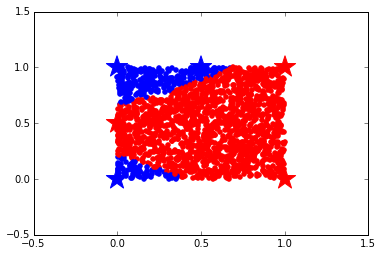

In [129]:
nn = NeuralNetwork([2,2,2,2,2,1])

X = np.array([[0, 0],
              [0, 1],  
              [0.5, 1],
              [0, 0.5],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1, 1, 1])

nn.fit(X, y, epochs = 20000)

visual_NN_boundaries(X, y)


## Breakout Exercise:

## Draw on a piece of paper the following points, using open circle if the corresponding target value, y, is 0 and filled circle for y = 1:


        X = [[0, 0],
             [0, 1],  
             [1, 0.5],
             [0, 0.5],
             [1, 0],
             [1, 1]])

        y = [0, 0, 0, 1, 1, 1]

## Train the NeuralNetwork class to reproduce the y, given X.

## Use the function visual_NN_boundaries to see the decision boundaries.


Input X with bias added:
 [[1.00000 0.00000 0.00000]
 [1.00000 0.00000 1.00000]
 [1.00000 1.00000 0.50000]
 [1.00000 0.00000 0.50000]
 [1.00000 1.00000 0.00000]
 [1.00000 1.00000 1.00000]]
epochs: 0
[0.00000 0.00000] [0.62764] 0
[0.00000 1.00000] [0.79032] 0
[1.00000 0.50000] [0.79085] 0
[0.00000 0.50000] [0.74398] 1
[1.00000 0.00000] [0.74658] 1
[1.00000 1.00000] [0.81109] 1
RMS 0.549156903095
epochs: 2000
[0.00000 0.00000] [0.01767] 0
[0.00000 1.00000] [0.17748] 0
[1.00000 0.50000] [0.57804] 0
[0.00000 0.50000] [0.80366] 1
[1.00000 0.00000] [0.82354] 1
[1.00000 1.00000] [0.52564] 1
RMS 0.331826549442
epochs: 4000
[0.00000 0.00000] [-0.37782] 0
[0.00000 1.00000] [0.34764] 0
[1.00000 0.50000] [0.48229] 0
[0.00000 0.50000] [0.94552] 1
[1.00000 0.00000] [0.95621] 1
[1.00000 1.00000] [0.48730] 1
RMS 0.356829092485
epochs: 6000
[0.00000 0.00000] [-0.06406] 0
[0.00000 1.00000] [0.32927] 0
[1.00000 0.50000] [0.46806] 0
[0.00000 0.50000] [0.94906] 1
[1.00000 0.00000] [0.96527] 1
[1.00000 1.00

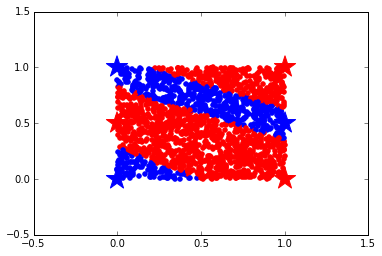

In [133]:
nn = NeuralNetwork([2,2,2,1])

X = np.array([[0, 0],
             [0, 1],  
             [1, 0.5],
             [0, 0.5],
             [1, 0],
             [1, 1]])

y = np.array([0, 0, 0, 1, 1, 1])

nn.fit(X, y, epochs = 20000)

visual_NN_boundaries(X, y)

## Breakout Exercise:

- ## Turn the function visual_NN_boundaries into a method for the class NeuralNetwork.  It can be invoked every 1/20 of the specified number of epochs, and show the decision boundary at that stage of learning.

- ## It helps to set the axis limits in the following way:

                plt.axis([-0.1, 1.1, -0.1, 1.1])

- ## And set the marker size to 40 for the training data.

- ## Try this on XOR and watch the learning process

- ## Try this on the following and watch the learning process


        X = [[0, 0],
             [0, 1],  
             [0.5, 1],
             [0, 0.5],
             [1, 0],
             [1, 1]]

        y = [0, 0, 0, 1, 1, 1]

In [ ]:
def visual_NN_boundaries(X, y, Nsamp = 2000):
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i][0],X[i][1], color = 'r', s = 500, marker = '*')
        else:
            plt.scatter(X[i][0],X[i][1], color = 'b', s = 500, marker = '*')
    x = np.random.random((Nsamp, 2))
    for j in range(len(x)):
        z = nn.predict(x[j])
        if z > 0.5:
            plt.scatter(x[j][0], x[j][1], color = 'r')
        else:
            plt.scatter(x[j][0], x[j][1], color = 'b')
        
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()

In [12]:
'''
Play with the learning_rate

The default is 0.2.  You will see that setting it to 0.4 gets you better result.


'''
import copy
def tanh(x):
    '''The logistic function as the activation'''
    return np.tanh(x)

def tanh_prime(z):
    '''derivative of the logistic function'''
    return 1 - z**2


class NeuralNetwork:
    
    '''
    Implementing multi-layer forward-feed ANN
    '''

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.L = len(layers) - 1

        # Set weights
        self.weights = []
        for l in range(1, self.L):
            w = np.random.random((layers[l-1] + 1, layers[l] + 1)) 
            self.weights.append(w)
        # output layer -- random((2+1, 1)) : 3 x 1
        w = np.random.random( (layers[l] + 1, layers[l+1])) 
        self.weights.append(w)
#         print(len(self.weights))
#         print(self.weights)
#         raise KeyboardInterrupt

    def fit(self, X, y, learning_rate=0.4, epochs=11000, tol = 0.01):
        '''
        Backpropagation
        '''
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        X_orig = copy.copy(X)
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        print('Input X with bias added:\n', X)
         
        for k in range(epochs):
            if k % (epochs/10) == 0:
                print('epochs:', k)
                error1 = 0
                for e in range(len(X)):
                    print(X[e][1:],self.predict(X[e][1:]),y[e] )
                    error1 += (self.predict(X[e][1:]) - y[e])**2
                RMS = ((error1)/len(y))**0.5
                print('RMS', RMS[0])
                if RMS < tol:
                    print('NN training succeeded!')
                    break
 
            i = np.random.randint(X.shape[0])
            a = [X[i]]
    
            for l in range(self.L):
                    tot_input_l = np.dot(a[l], self.weights[l])
                    a_lplusOne = self.activation(tot_input_l)
                    a.append(a_lplusOne)

            # Now preparing for backpropagation by finding all the delta's
            # and store them in a list, deltas:                    
                    
            # output layer; a[-1] is the output, z
            error = y[i] - a[-1]
            # deltas at this point is list that contains a single vector,
            # the delta closest to the output -- eqn (3) on slide 9.
            deltas = [error * self.activation_prime(a[-1])]

            # now find the rest of the deltas.
            # remember len(a) is L + 1, and len(self.weights) is L,
            # where L is the number of layers.  In our case, L = 2.
            for l in range(self.L - 1, 0, -1): 
                delta_l = deltas[-1]
                # This is eqn (4) on slide 9.                
                delta_lminusOne = delta_l.dot(self.weights[l].T)*self.activation_prime(a[l])
                deltas.append(delta_lminusOne)
                
            # reverse
            # [layer 2(output)->layer 1(hidden)]  => [layer 1(hidden)->layer 2(output)]
            deltas.reverse()

            # backpropagation: adjusting weights
            for l in range(self.L):
                a_l = np.atleast_2d(a[l])
                delta_l = np.atleast_2d(deltas[l])
                # implementing eqn (5) on slide 12
                # (to be precise, the equation just above (5))
                self.weights[l] += learning_rate * a_l.T.dot(delta_l)
            if k % (epochs/20) == 0:
# #                 plt.plot(x, np.sin(k*x))
                display.clear_output(wait=True)
                display.display(self.visual_NN_boundaries(X_orig, y, Nsamp = 2000))
                time.sleep(0.2)
                plt.clf()
        
                
        if RMS > tol:
            print('NN training failed.')
            
        
            
    def visual_NN_boundaries(self, X, y, Nsamp = 2000):
        for i in range(len(y)):
            if y[i] == 1:
                plt.scatter(X[i][0],X[i][1], color = 'r', s = 500, marker = '*')
            else:
                plt.scatter(X[i][0],X[i][1], color = 'b', s = 500, marker = '*')
        x = np.random.random((Nsamp, 2))
        for j in range(len(x)):
            z = nn.predict(x[j])
            if z > 0.5:
                plt.scatter(x[j][0], x[j][1], color = 'r')
            else:
                plt.scatter(x[j][0], x[j][1], color = 'b')

        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.show()

    def predict(self, x): 
        '''
        forward propagation
        (Note -- possibly improvement:
        a) create a method that adds bias to be used here and in the fit method.
        b) create a method that does forward propagation to be used here and 
        in the method fit.)
        '''
        # adding bias -- np.ones(1) seems silly: 
        # But to concatenate, both objects have to be numpy arrays.
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=1)  
        # forward propagation
        for l in range(0, self.L):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
        

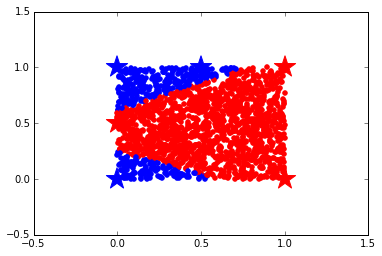

None

epochs: 8000
[0.00000 0.00000] [0.01437] 0
[0.00000 1.00000] [-0.00194] 0
[0.50000 1.00000] [0.00697] 0
[0.00000 0.50000] [0.99092] 1
[1.00000 0.00000] [0.99201] 1
[1.00000 1.00000] [0.99203] 1
RMS 0.0088376561022
NN training succeeded!


In [13]:
nn = NeuralNetwork([2,2,2,1])
X1 = np.array([[0, 0],
             [0, 1],  
             [0.5, 1],
             [0, 0.5],
             [1, 0],
             [1, 1]])

y1 = np.array([0, 0, 0, 1, 1, 1])
nn.fit(X1, y1, epochs = 20000)

In [ ]:
'''Dynamicall unpdata maplibplot figure'''
import time
from IPython import display

x = np.linspace(0, np.pi*2, 10000)
for k in range(20):
    plt.plot(x, np.sin(k*x))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)
    plt.clf()
plt.show()

In [ ]:
nn = NeuralNetwork([2,2,1], activation='tanh')

X = np.array([[0, 0],
              [0, 1],          
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

nn.fit(X, y, epochs = 20000)


# End of Week 8-2